<a href="https://colab.research.google.com/github/minonza/NLP/blob/main/NLP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Word Embedding_1, count vectorizaation BOW, n-gram***

*machine learning models do not understand any string or word it understands number. we willuse technique which will convert the text into number.

this number is called vector*


high level word embedding



**BOW** model is used in NLP to represent the given text/sentence/document without giving any importance to grammer or occurance order of the words.

--> it keeps count of frequency of the words in the text document.

ex: my name is mini sharma. my father is a manager.
I:2 is:2, father:1



drawback: gives more importance to stopwords.  to resove this Tf-idf was introduced.

**n-gram** keeps context of text intact. N-gram is sequence of words from a given text document. unlike bow method.. which only cares about frequency and doesnt care about grammer.

n=1 unigram

n=2 bigram

n=3 trigram and so n.

example: I went for a cup of coffee but i ended up having lunch with her.

unigram: i,went,to,have,a,cup,of,coffee......

bigram, i went, to have, a cup ,.....

trigram, i went to, a cup of, coffee and ended,.....

bow method is nothing but n-gram n=1

**skip grams:** words not necessary be in the same order some words can be skipped.
example: i dont understand what is the problem here.

1 skip 2 grams: i understand, dont what , understand is, what the , is problem, the here.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
import pandas as pd
string=["This is an example of bag of words!"] #single document ("," seperates each document)
vect1=CountVectorizer() #converts text into tokens
vect1.fit_transform(string)
print("bag of words",vect1.get_feature_names())

bag of words ['an', 'bag', 'example', 'is', 'of', 'this', 'words']


In [4]:
vect1.vocabulary_

{'an': 0, 'bag': 1, 'example': 2, 'is': 3, 'of': 4, 'this': 5, 'words': 6}

In [5]:
#fit and transform to check if the word is present or not
c_vect=CountVectorizer()
c_vect.fit(string)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [6]:
string2=['Lets understand is of word is']
c_new_vect=c_vect.transform(string2)
print("text present at",c_new_vect.toarray())
#compare with indexes
print("original indexes",vect1.get_feature_names()) #occurance of is and of

text present at [[0 0 0 2 1 0 0]]
original indexes ['an', 'bag', 'example', 'is', 'of', 'this', 'words']


In [7]:
##bag of words using stopwords (you can avoid writing extra steps to remove stopwords)
import nltk
nltk.download('stopwords')
stopwords=stopwords.words('english')
string=["This is an example of bag of words"]
vect1=CountVectorizer(stop_words=stopwords)
print(vect1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)


In [8]:
vect1.fit_transform(string)
print("bag of words:",vect1.get_feature_names())
print("vocab           :vect1.vocabulary_")#printing only important words except stop words

bag of words: ['bag', 'example', 'words']
vocab           :vect1.vocabulary_


In [9]:
def text_matrix(message, countvect):
  terms_doc=countvect.fit_transform(message)
  return pd.DataFrame(terms_doc.toarray(),columns=countvect.get_feature_names())


In [10]:
message=['A message is a discrete unit of communication intended by the source for consumption by some recipient or group of recipients.']
c_vect=CountVectorizer()
print("below matyrix is bag of words approach")
text_matrix(message,c_vect)

below matyrix is bag of words approach


,by,communication,consumption,discrete,for,group,intended,is,message,of,or,recipient,recipients,some,source,the,unit
0,2,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1


In [11]:
#n-grams
from sklearn.feature_extraction.text import CountVectorizer

from nltk.tokenize import word_tokenize
string=["This is an exmaple of gram!"]
vect1=CountVectorizer(ngram_range=(1,1))

vect1.fit_transform(string)

vect2=CountVectorizer(ngram_range=(2,2))

vect2.fit_transform(string)

vect3=CountVectorizer(ngram_range=(3,3))

vect3.fit_transform(string)

vect4=CountVectorizer(ngram_range=(4,4))

vect4.fit_transform(string)

print("1-gram:",vect1.get_feature_names())
print("2-gram:",vect2.get_feature_names())
print("3-gram:",vect3.get_feature_names())
print("4-gram:",vect4.get_feature_names())








1-gram: ['an', 'exmaple', 'gram', 'is', 'of', 'this']
2-gram: ['an exmaple', 'exmaple of', 'is an', 'of gram', 'this is']
3-gram: ['an exmaple of', 'exmaple of gram', 'is an exmaple', 'this is an']
4-gram: ['an exmaple of gram', 'is an exmaple of', 'this is an exmaple']


***tf-idf --> Term frequency-inverse document frequency***
reflects how import is a word to a document in a collection of corpus.

**term frequency = (number of times word appears in document)/(total number of words in the document)**


-disadvantage of term frequency is that gives higher weight to words with higher frequency.


***Inverse document frequency*** = log[(Number of document)/(number of documents the word appears in)]

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfid=TfidfVectorizer(smooth_idf=False)
doc=["This is an example","we will see how it works","IDF can be confusing"]
doc_vector=tfid.fit_transform(doc)
df=pd.DataFrame(doc_vector.todense(),columns=tfid.get_feature_names())
df

,an,be,can,confusing,example,how,idf,is,it,see,this,we,will,works
0,0.5,0.0,0.0,0.0,0.5,0.000000,0.0,0.5,0.000000,0.000000,0.5,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.408248,0.0,0.0,0.408248,0.408248,0.0,0.408248,0.408248,0.408248
2,0.0,0.5,0.5,0.5,0.0,0.000000,0.5,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


In [13]:
def text_matrix(message,countvect):
  terms_doc=countvect.fit_transform(message)
  return pd.DataFrame(terms_doc.toarray(),columns=countvect.get_feature_names())
  

In [14]:
feb_message=["Who is that covid covid",
             "covid is nothing",
             "covid cases are dropping"]
tf=TfidfVectorizer()
text_matrix(feb_message,tf)
             

,are,cases,covid,dropping,is,nothing,that,who
0,0.000000,0.000000,0.592567,0.000000,0.381519,0.000000,0.501651,0.501651
1,0.000000,0.000000,0.425441,0.000000,0.547832,0.720333,0.000000,0.000000
2,0.546454,0.546454,0.322745,0.546454,0.000000,0.000000,0.000000,0.000000


In [15]:
jul_message=["what is that covid covid",
             "covid is bad"]
text_matrix(jul_message,tf)

,bad,covid,is,that,what
0,0.000000,0.668501,0.334251,0.469778,0.469778
1,0.704909,0.501549,0.501549,0.000000,0.000000


**Countvectorizer,TF-IDF,n-grams**

In [16]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
arr=['car was cleaned by jack','jack was cleaned by car.']

In [17]:
vectorizer=CountVectorizer(ngram_range=(2,2))
X=vectorizer.fit_transform(arr)
print("feature names \n",vectorizer.get_feature_names())
print("Array \n",X.toarray())

feature names 
 ['by car', 'by jack', 'car was', 'cleaned by', 'jack was', 'was cleaned']
Array 
 [[0 1 1 1 0 1]
 [1 0 0 1 1 1]]


In [18]:
vectorizer=TfidfVectorizer(ngram_range=(2,2))
X=vectorizer.fit_transform(arr)
print(X.toarray())

[[0.         0.57615236 0.57615236 0.40993715 0.         0.40993715]
 [0.57615236 0.         0.         0.40993715 0.57615236 0.40993715]]


**Word2Vec**

in one hot encoding  1. have a good day 2. have a great day


they both have same encoding thats why we use word2vec.



In [29]:
import re
import nltk
import string
from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline


In [33]:
paragraph="""Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus(for example, by coughing into a flexed elbow). Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment.  Older people, and those with underlying medical problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more likely to develop serious illness.

The best way to prevent and slow down transmission is to be well informed about the COVID-19 virus, the disease it causes and how it spreads. Protect yourself and others from infection by washing your hands or using an alcohol based rub frequently and not touching your face. 

The COVID-19 virus spreads primarily through droplets of saliva or discharge from the nose when an infected person coughs or sneezes, so it’s important that you also practice respiratory etiquette (for example, by coughing into a flexed elbow)."""

In [39]:

paragraph = paragraph.translate(str.maketrans(" "," ",string.punctuation))
text=re.sub(r'\[[0-9]*\]',' ',paragraph)
text=re.sub(r'\s+',' ',text)
text=text.lower()
text=re.sub(r'\d',' ',text)
text=re.sub(r'\s+',' ',text)




In [40]:
#preparing the dataset
nltk.download('punkt')
sentences = nltk.sent_tokenize(text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [41]:
sent_word=[nltk.word_tokenize(sentence) for sentence in sentences]
print(sent_word)

[['coronavirus', 'disease', 'covid', 'is', 'an', 'infectious', 'disease', 'caused', 'by', 'a', 'newly', 'discovered', 'coronavirusfor', 'example', 'by', 'coughing', 'into', 'a', 'flexed', 'elbow', 'most', 'people', 'infected', 'with', 'the', 'covid', 'virus', 'will', 'experience', 'mild', 'to', 'moderate', 'respiratory', 'illness', 'and', 'recover', 'without', 'requiring', 'special', 'treatment', 'older', 'people', 'and', 'those', 'with', 'underlying', 'medical', 'problems', 'like', 'cardiovascular', 'disease', 'diabetes', 'chronic', 'respiratory', 'disease', 'and', 'cancer', 'are', 'more', 'likely', 'to', 'develop', 'serious', 'illness', 'the', 'best', 'way', 'to', 'prevent', 'and', 'slow', 'down', 'transmission', 'is', 'to', 'be', 'well', 'informed', 'about', 'the', 'covid', 'virus', 'the', 'disease', 'it', 'causes', 'and', 'how', 'it', 'spreads', 'protect', 'yourself', 'and', 'others', 'from', 'infection', 'by', 'washing', 'your', 'hands', 'or', 'using', 'an', 'alcohol', 'based', 'r

In [43]:
punc=string.punctuation
punc

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [44]:
for i in range(len(sent_word)):
  sent_word[i]=[word for word in sent_word[i]
                if word not in stopwords.words('english') if word not in punc]

In [45]:
model=Word2Vec(sent_word,min_count=1)
words=model.wv.vocab

In [46]:
vector=model.wv['covid']
print(vector)

[ 2.4644772e-03 -2.4026323e-03 -1.6915271e-03 -3.4454272e-03
 -1.9637994e-03  1.4502263e-03 -4.0057451e-03 -5.0268770e-04
  1.5123765e-03 -4.5204065e-03  1.0447941e-03  4.9018380e-03
  3.1340558e-03 -1.8535989e-03  4.2031375e-03  1.4384763e-03
 -3.6380009e-03 -6.0185877e-04  3.1975952e-03  2.6860682e-03
  2.7918611e-03  3.8005046e-03 -2.0421389e-03 -3.9887475e-03
  5.4314482e-04  3.1554056e-04  2.6066063e-03 -8.8046677e-04
 -3.7421010e-04 -2.5100629e-03  4.5233178e-03 -4.4533494e-03
  4.7770548e-03  4.1449200e-03 -2.3442409e-03  4.2953459e-03
 -4.9711671e-04 -2.9974990e-03 -4.3178378e-03  1.1965767e-03
  1.1391431e-03  2.7671794e-03  6.6914159e-04  3.4631097e-03
 -5.4776546e-04 -4.0721903e-03 -2.5708410e-03 -1.8198419e-03
 -9.4564102e-04  3.7373605e-03 -4.4691721e-03 -2.5960542e-03
  1.9991223e-03  1.2973349e-03 -2.5526113e-03 -3.9138026e-03
  4.2627344e-04  2.7380602e-03 -3.7244288e-03  8.0644801e-05
 -4.0676100e-03 -2.8395932e-03 -1.9313694e-03  1.1229976e-03
 -4.2664669e-03  2.95178

In [47]:
similar=model.wv.most_similar('coronavirus',topn=5)

In [48]:
similar

[('recover', 0.18466618657112122),
 ('likely', 0.1837800145149231),
 ('caused', 0.16574087738990784),
 ('virus', 0.16325588524341583),
 ('rub', 0.1601230353116989)]

In [53]:
model.wv.similarity(w1='coronavirus',w2='virus')

0.16325589

In [54]:
#filter non simiarity
model.wv.doesnt_match(["infection","spread"])

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'infection'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


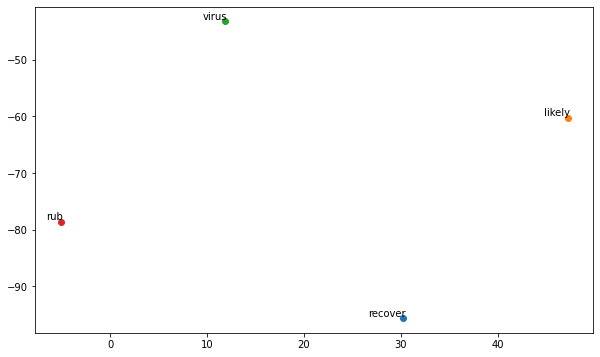

In [57]:
from sklearn.manifold import TSNE
vocab=['recover','likely','virus','rub']
def tsne_plot(model):
  labels=[]
  wordvecs=[]
  for word in vocab:
    wordvecs.append(model[word])
    labels.append(word)
  tsne_model=TSNE(perplexity=3,n_components=2,init='pca',random_state=42)
  cordinates=tsne_model.fit_transform(wordvecs)
  x=[]
  y=[]
  for value in cordinates:
    x.append(value[0])
    y.append(value[1])
  plt.figure(figsize=(10,6))
  for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i],y[i]),
                 xytext=(2, 2),
                 textcoords='offset points', ha ='right')
    
tsne_plot(model)
plt.show()        